In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy


In [2]:
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_68k_Zheng/Zheng_PBMC.h5ad')
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_68k_Zheng\Zheng_PBMC.h5ad")
adata.shape

(68579, 32738)

In [3]:
adata.obs.head()

,celltype,TSNE.1,TSNE.2
AAACATACACCCAA-1,CD8+ Cytotoxic T,7.565540,0.441370
AAACATACCCCTCA-1,CD8+/CD45RA+ Naive Cytotoxic,2.552626,-25.786672
AAACATACCGGAGA-1,CD4+/CD45RO+ Memory,-5.771831,11.830846
AAACATACTAACCG-1,CD19+ B,1.762556,25.979346
AAACATACTCTTCA-1,CD4+/CD25 T Reg,-16.793856,-16.589970


In [4]:
adata.var.head()

,gene_symbols
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8


## Quality control
(did not actually filter out cells)

In [5]:
# Calculate quality control metrics
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var['gene_symbols'].str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [ ]:
# quality control violin plot
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
# quality control violin plot
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             stripplot=False, multi_panel=True)

In [ ]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [9]:
# filtering out the low quality cells
# adata = adata[adata.obs.n_genes_by_counts < 2500, :]
# adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

## Normalization

In [5]:
# Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [12]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression
# adata.raw = adata

In [15]:
# regress out the unwanted sources of variation
# sc.pp.regress_out(adata_HVG1000, ['total_counts', 'pct_counts_mt'])
# Scale each gene to unit variance
# sc.pp.scale(adata_HVG1000, max_value=10)

## PCA

In [6]:
sc.tl.pca(adata, svd_solver="arpack")

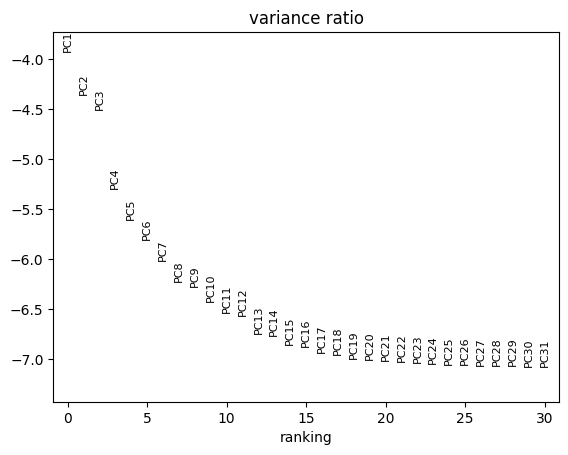

In [7]:
sc.pl.pca_variance_ratio(adata, log=True)

## UMAP

In [8]:
# neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# sc.tl.paga(adata_HVG1000)
# sc.pl.paga(adata_HVG1000, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata_HVG1000, init_pos='paga')

In [9]:
sc.tl.umap(adata)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


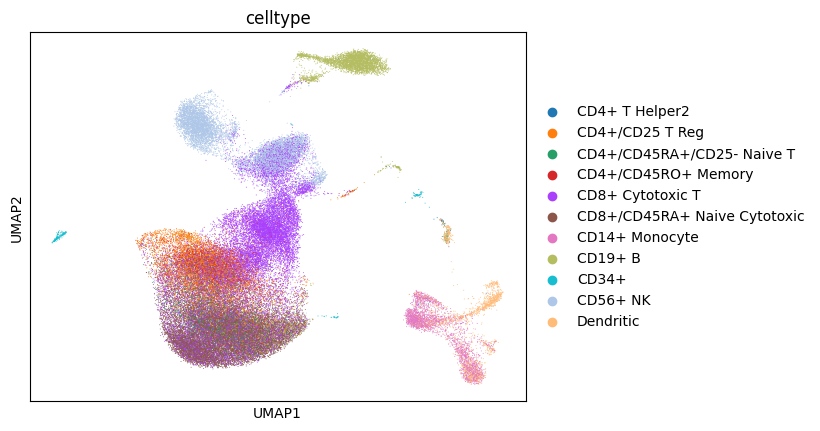

In [11]:
sc.pl.umap(adata, color='celltype')

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


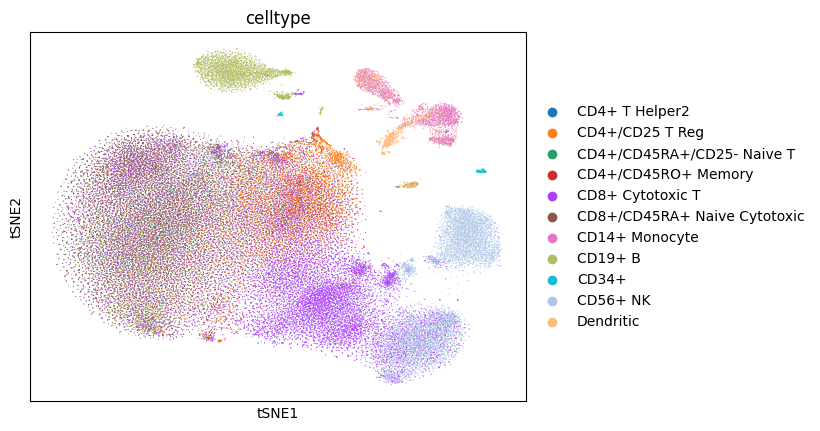

In [14]:
sc.tl.tsne(adata, random_state=0, n_pcs=50)
sc.pl.tsne(adata, color='celltype')


## Leiden

In [ ]:
sc.tl.leiden(
    adata,
    resolution=0.9,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)

In [24]:
sc.tl.leiden(adata, resolution=0.8)

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


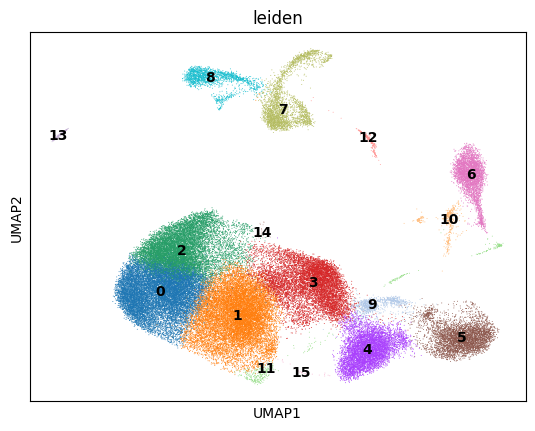

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


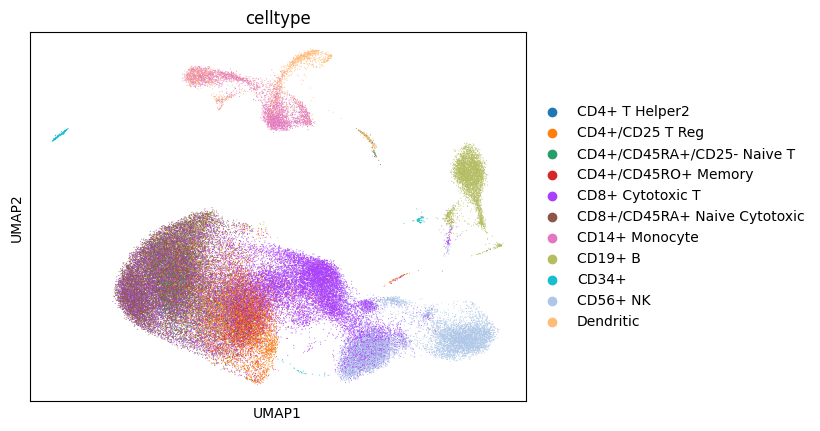

In [25]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color='leiden', legend_loc="on data")
sc.pl.umap(adata, color='celltype', legend_loc="right margin")

In [26]:
adata.obs['leiden'].unique()

['3', '2', '1', '6', '0', ..., '10', '8', '11', '13', '14']
Length: 16
Categories (16, object): ['0', '1', '2', '3', ..., '12', '13', '14', '15']

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


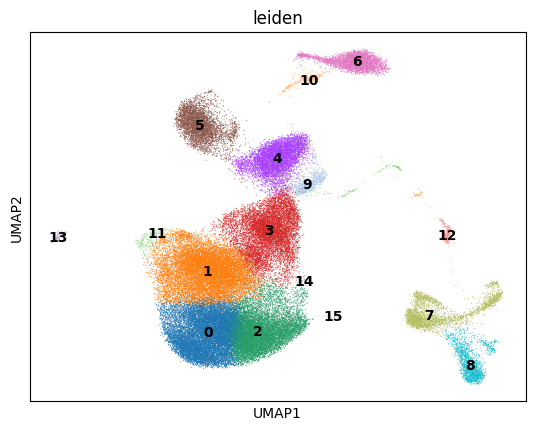

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


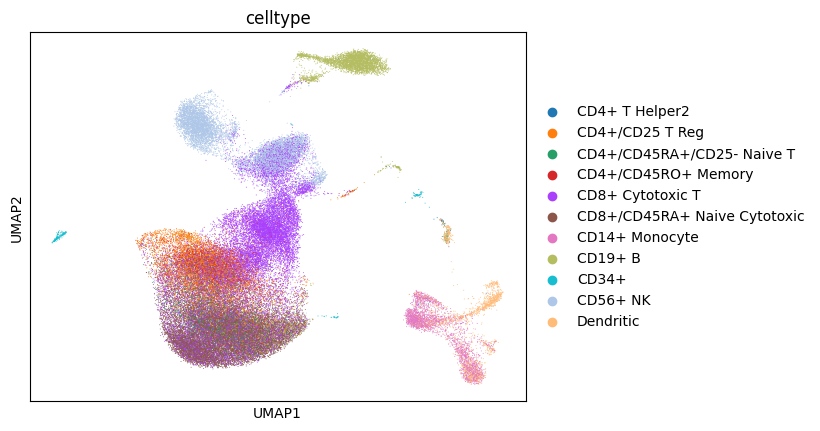

In [27]:
# no paga
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden', legend_loc="on data")
sc.pl.umap(adata, color='celltype', legend_loc="right margin")